# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import sys
!{sys.executable} -m pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
ls

API_practice.ipynb    WeatherPy.ipynb       config.py
LICENSE               __pycache__/          random_numbers.ipynb
README.md             api_keys.py
Untitled.ipynb        cities.csv


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [5]:
#Show cities
cities

['bac lieu',
 'hobart',
 'chokurdakh',
 'matay',
 'jamestown',
 'ushuaia',
 'georgetown',
 'rikitea',
 'concarneau',
 'tuktoyaktuk',
 'quelimane',
 'hithadhoo',
 'punta arenas',
 'cape town',
 'tautira',
 'terra santa',
 'ostrovnoy',
 'busselton',
 'ust-nera',
 'albany',
 'obluche',
 'sanmenxia',
 'simplicio mendes',
 'severo-kurilsk',
 'yellowknife',
 'klaksvik',
 'geraldton',
 'solvychegodsk',
 'porto novo',
 'garissa',
 'illoqqortoormiut',
 'gazni',
 'vaini',
 'vao',
 'presidencia roque saenz pena',
 'carbonia',
 'saint-philippe',
 'tshikapa',
 'taolanaro',
 'east london',
 'grindavik',
 'sobolevo',
 'victoria',
 'bredasdorp',
 'husavik',
 'kangaatsiaq',
 'ponta do sol',
 'kimbe',
 'sao filipe',
 'taltal',
 'sulangan',
 'hilo',
 'ust-kuyga',
 'loandjili',
 'arlit',
 'ornskoldsvik',
 'clyde river',
 'nizhneyansk',
 'khatanga',
 'san cristobal',
 'mataura',
 'taywarah',
 'sattahip',
 'mersing',
 'nanortalik',
 'amapa',
 'new norfolk',
 'san vicente',
 'southern pines',
 'ketchikan',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#Creating Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

Listofcities = []


print('Starting Data Retrieval')
                                                                                    #print('-' *50)

record_count = 1
set_count = 1

#Query url
query_url = base_url + 'APPID=' + weather_api_key + '&units=imperial'

for i, city in enumerate(cities):
    city_url = query_url + '&q=' + city.replace(' ', '+')
    print(f'Processing Records {record_count} of Set {set_count} - {city}')
    record_count +=1

    try: 
        weather_response = requests.get(city_url).json()

       # print(weather_response)
        
        city_lat = weather_response["coord"]["lat"]
        
        city_lng = weather_response["coord"]["lon"]
        
        
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]
      #  date.append(weather_response['dt'])
        print('Successful')    
            # Setting up a list to append the data
        Listofcities.append({"City": city, 
                          "Latitude": city_lat, 
                          "longitude": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     
    except:
        print('city not found')
        
        pass

print(Listofcities)
#print('Data Retrieval Complete')




Starting Data Retrieval
Processing Records 1 of Set 1 - bac lieu
Successful
Processing Records 2 of Set 1 - hobart
Successful
Processing Records 3 of Set 1 - chokurdakh
Successful
Processing Records 4 of Set 1 - matay
Successful
Processing Records 5 of Set 1 - jamestown
Successful
Processing Records 6 of Set 1 - ushuaia
Successful
Processing Records 7 of Set 1 - georgetown
Successful
Processing Records 8 of Set 1 - rikitea
Successful
Processing Records 9 of Set 1 - concarneau
Successful
Processing Records 10 of Set 1 - tuktoyaktuk
Successful
Processing Records 11 of Set 1 - quelimane
Successful
Processing Records 12 of Set 1 - hithadhoo
Successful
Processing Records 13 of Set 1 - punta arenas
Successful
Processing Records 14 of Set 1 - cape town
Successful
Processing Records 15 of Set 1 - tautira
Successful
Processing Records 16 of Set 1 - terra santa
Successful
Processing Records 17 of Set 1 - ostrovnoy
Successful
Processing Records 18 of Set 1 - busselton
Successful
Processing Record

Successful
Processing Records 151 of Set 1 - ilulissat
Successful
Processing Records 152 of Set 1 - chuy
Successful
Processing Records 153 of Set 1 - puerto ayora
Successful
Processing Records 154 of Set 1 - marawi
Successful
Processing Records 155 of Set 1 - cayeli
Successful
Processing Records 156 of Set 1 - port macquarie
Successful
Processing Records 157 of Set 1 - lubango
Successful
Processing Records 158 of Set 1 - honiara
Successful
Processing Records 159 of Set 1 - linxia
Successful
Processing Records 160 of Set 1 - marcona
city not found
Processing Records 161 of Set 1 - solsvik
city not found
Processing Records 162 of Set 1 - najran
Successful
Processing Records 163 of Set 1 - burnie
Successful
Processing Records 164 of Set 1 - dingle
Successful
Processing Records 165 of Set 1 - esso
Successful
Processing Records 166 of Set 1 - kaitangata
Successful
Processing Records 167 of Set 1 - aykhal
Successful
Processing Records 168 of Set 1 - fershampenuaz
Successful
Processing Record

Successful
Processing Records 302 of Set 1 - kankaanpaa
Successful
Processing Records 303 of Set 1 - ouallam
Successful
Processing Records 304 of Set 1 - kefamenanu
Successful
Processing Records 305 of Set 1 - narino
Successful
Processing Records 306 of Set 1 - kampot
Successful
Processing Records 307 of Set 1 - saint george
Successful
Processing Records 308 of Set 1 - haines junction
Successful
Processing Records 309 of Set 1 - fevralsk
city not found
Processing Records 310 of Set 1 - belmonte
Successful
Processing Records 311 of Set 1 - kodinsk
Successful
Processing Records 312 of Set 1 - along
Successful
Processing Records 313 of Set 1 - lima
Successful
Processing Records 314 of Set 1 - urengoy
Successful
Processing Records 315 of Set 1 - sioux lookout
Successful
Processing Records 316 of Set 1 - sindou
Successful
Processing Records 317 of Set 1 - hamilton
Successful
Processing Records 318 of Set 1 - ambulu
Successful
Processing Records 319 of Set 1 - cockburn town
Successful
Proces

Successful
Processing Records 454 of Set 1 - ransang
Successful
Processing Records 455 of Set 1 - dzaoudzi
Successful
Processing Records 456 of Set 1 - bilma
Successful
Processing Records 457 of Set 1 - senanga
Successful
Processing Records 458 of Set 1 - kondinskoye
Successful
Processing Records 459 of Set 1 - acala
Successful
Processing Records 460 of Set 1 - kirkwall
Successful
Processing Records 461 of Set 1 - fort nelson
Successful
Processing Records 462 of Set 1 - sabha
Successful
Processing Records 463 of Set 1 - pellerd
Successful
Processing Records 464 of Set 1 - gafanha da encarnacao
Successful
Processing Records 465 of Set 1 - bardiyah
Successful
Processing Records 466 of Set 1 - san antonio
Successful
Processing Records 467 of Set 1 - sovetskaya
Successful
Processing Records 468 of Set 1 - paamiut
Successful
Processing Records 469 of Set 1 - kokopo
Successful
Processing Records 470 of Set 1 - anadyr
Successful
Processing Records 471 of Set 1 - srednekolymsk
Successful
Proce

Successful
Processing Records 605 of Set 1 - la ronge
Successful
Processing Records 606 of Set 1 - oum hadjer
Successful
Processing Records 607 of Set 1 - umba
Successful
Processing Records 608 of Set 1 - chumikan
Successful
Processing Records 609 of Set 1 - bougouni
Successful
Processing Records 610 of Set 1 - fairbanks
Successful
Processing Records 611 of Set 1 - birjand
Successful
Processing Records 612 of Set 1 - bouar
Successful
Processing Records 613 of Set 1 - huarmey
Successful
Processing Records 614 of Set 1 - victor harbor
Successful
Processing Records 615 of Set 1 - tocopilla
Successful
Processing Records 616 of Set 1 - charters towers
Successful
Processing Records 617 of Set 1 - caravelas
Successful
Processing Records 618 of Set 1 - byron bay
Successful
Processing Records 619 of Set 1 - ust-kulom
Successful
Processing Records 620 of Set 1 - wajir
Successful
Processing Records 621 of Set 1 - samalaeulu
city not found
Processing Records 622 of Set 1 - iguape
Successful
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#Creating the dataframe
Listofcities = pd.DataFrame(Listofcities).sort_index(axis=1)
Listofcities.to_csv('cities.csv')

#Printing the dataframe
Listofcities

,City,Cloudiness,Country,Date,Humidity,Latitude,Max Temp,Wind Speed,longitude
0,bac lieu,56,VN,1674492867,83,9.2850,77.29,14.56,105.7244
1,hobart,32,AU,1674492867,93,-42.8794,60.26,1.14,147.3294
2,chokurdakh,100,RU,1674492867,93,70.6333,-24.97,6.11,147.9167
3,matay,0,EG,1674492390,50,28.4190,63.48,10.60,30.7792
4,jamestown,100,US,1674492510,75,42.0970,29.79,10.36,-79.2353
...,...,...,...,...,...,...,...,...,...
581,kalmunai,98,LK,1674492992,87,7.4167,76.42,7.70,81.8167
582,shelburne,93,CA,1674492992,94,44.0787,30.76,9.69,-80.2041
583,togul,100,RU,1674492993,95,53.4650,12.02,10.20,85.9128
584,luang prabang,5,LA,1674492993,58,19.8856,62.85,0.72,102.1347


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
count = (Listofcities['Humidity'] > 100).sum()

#Print
count

#There is no cities with humidity over 100%

0

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
#Skipped as there is no cities with humidity over 100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This scatter plot indicates that there is a overall decrease in temperature as you increase the latitude


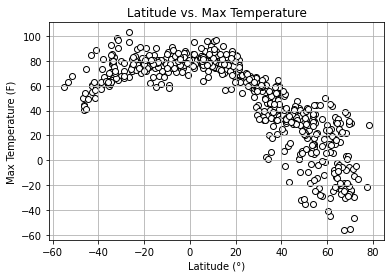

In [70]:
#Plotting the values
x_values = Listofcities['Latitude']
y_values = Listofcities['Max Temp']

#Creating the Scatter graph
plt.scatter(x_values, y_values, edgecolors = 'black', color = 'white')

#Changing the background from clear to grid
plt.grid()

#Creating the title
plt.title('Latitude vs. Max Temperature')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temperature (F)')

#Show Figure
plt.show

#Including a statement
print('This scatter plot indicates that there is a overall decrease in temperature as you increase the latitude')

#Creating png of results
plt.savefig('WeatherPyPhotos/LatitudeVSMaxTemperature.png')

## Latitude vs. Humidity Plot

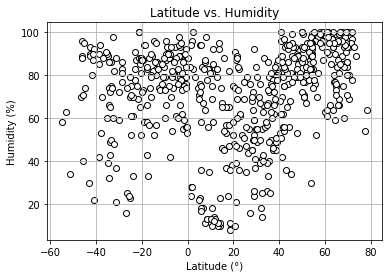

This plot shows that overall there is high humidity, however when the latitude is from 20-40° there is a noticible dip in humidity


<Figure size 432x288 with 0 Axes>

In [71]:
#Plotting the values
x_values = Listofcities['Latitude']
y_values = Listofcities['Humidity']


#Creating the Scatter graph
plt.scatter(x_values, y_values, edgecolors = 'black', color = 'white')

#Changing the background from clear to grid
plt.grid()

#Creating the title
plt.title('Latitude vs. Humidity')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')

#Show Figure
plt.show()

#Including a statement
print('This plot shows that overall there is high humidity, however when the latitude is from 20-40° there is a noticible dip in humidity')

# Save the Figure
plt.savefig('WeatherPyPhotos/LatitudeVSHumidity.png')


## Latitude vs. Cloudiness Plot

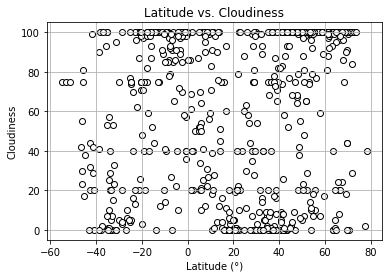

There is no correlation that can be deduced


<Figure size 432x288 with 0 Axes>

In [72]:
#Plotting the values
x_values = Listofcities['Latitude']
y_values = Listofcities['Cloudiness']

#Creating the Scatter graph
plt.scatter(x_values, y_values, edgecolors = 'black', color = 'white')

#Changing the background from clear to grid
plt.grid()

#Creating the title
plt.title('Latitude vs. Cloudiness')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness')

#Show Figure
plt.show()

#Including a statement
print('There is no correlation that can be deduced')

#Creating png of results
plt.savefig('WeatherPyPhotos/LatitudeVSCloudiness.png')

## Latitude vs. Wind Speed Plot

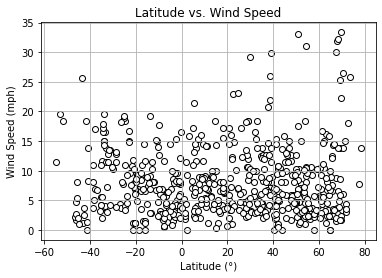

This plot indicates that there is a lower windspeed across the latitude, hoever in some instances with higher latitude there is also high windspeeds but this is not a firm correlation


<Figure size 432x288 with 0 Axes>

In [73]:
#Plotting the values
x_values = Listofcities['Latitude']
y_values = Listofcities['Wind Speed']

#Creating the Scatter graph
plt.scatter(x_values, y_values, edgecolors = 'black', color = 'white')

#Changing the background from clear to grid
plt.grid()

#Creating the title
plt.title('Latitude vs. Wind Speed')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (mph)')

#Show Figure
plt.show()

#Including a statement
print('This plot indicates that there is a lower windspeed across the latitude, hoever in some instances with higher latitude there is also high windspeeds but this is not a firm correlation')

#Creating png of results
plt.savefig('WeatherPyPhotos/LatitudeVSWindSpeed.png')

## Linear Regression

In [38]:
#Creating dataframes for the North Hemisphere and the Southern Hemisphere

NorthernHemi = Listofcities.loc[Listofcities['Latitude'] >= 0]
SouthernHemi = Listofcities.loc[Listofcities['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

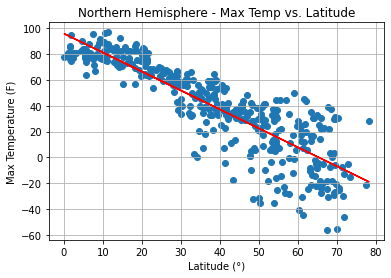

There is a negative correlation between Max Temp and Latitude. As latitude increases max temperature decreases.


<Figure size 432x288 with 0 Axes>

In [74]:
#Getting the values
x_values = NorthernHemi['Latitude']
y_values = NorthernHemi['Max Temp']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temperature (F)')


#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a negative correlation between Max Temp and Latitude. As latitude increases max temperature decreases.')

#Creating png of results
plt.savefig('WeatherPyPhotos/NorthernHemisphereLatitudeVSMaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

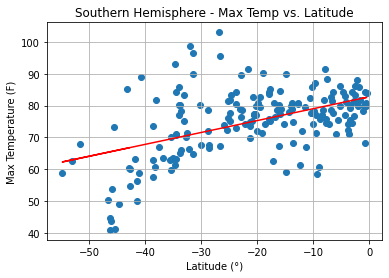

There is a slight positive correlation between max temperature and latitude in the Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [75]:
#Getting the values
x_values = SouthernHemi['Latitude']
y_values = SouthernHemi['Max Temp']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temperature (F)')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a slight positive correlation between max temperature and latitude in the Southern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/SouthernHemisphereLatitudeVSMaxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

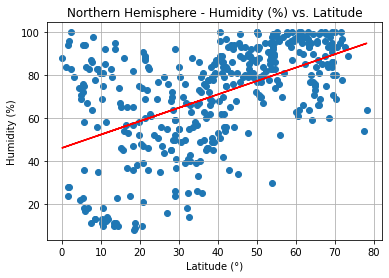

There is a positive correlations between humidity and latitude in the Northern Hemisphere


<Figure size 432x288 with 0 Axes>

In [76]:
#Getting the values
x_values = NorthernHemi['Latitude']
y_values = NorthernHemi['Humidity']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a positive correlations between humidity and latitude in the Northern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/NorthernHemisphereHumidityVSLatitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

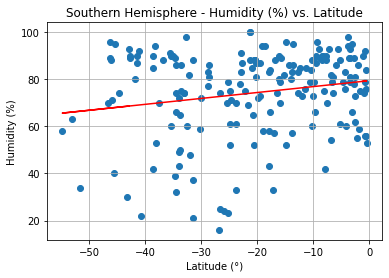

There is a weak positive correlation between humidity and latitude in the Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [77]:
#Getting the values
x_values = SouthernHemi['Latitude']
y_values = SouthernHemi['Humidity']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a weak positive correlation between humidity and latitude in the Southern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/SouthernHemisphereHumidityVSLatitude.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

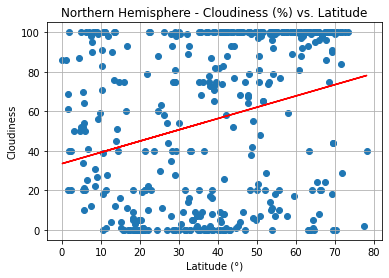

There is a weak positive correlation between cloudiness and latitude in the Northern Hemisphere


<Figure size 432x288 with 0 Axes>

In [78]:
#Getting the values
x_values = NorthernHemi['Latitude']
y_values = NorthernHemi['Cloudiness']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a weak positive correlation between cloudiness and latitude in the Northern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/NorthernHemisphereCloudinessVSLatitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

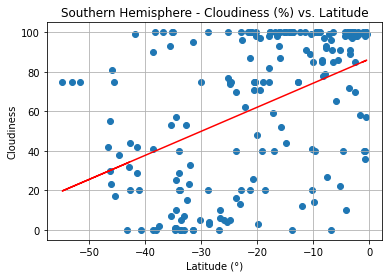

There is a weak positive correlation between cloudiness and latitude in the Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [79]:
#Getting the values
x_values = SouthernHemi['Latitude']
y_values = SouthernHemi['Cloudiness']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a weak positive correlation between cloudiness and latitude in the Southern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/SouthernHemisphereCloudinessVSLatitude.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

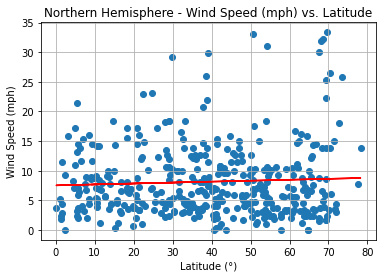

There is a slight positive correlation between max temperature and latitude in the Northern Hemisphere


<Figure size 432x288 with 0 Axes>

In [80]:
#Getting the values
x_values = NorthernHemi['Latitude']
y_values = NorthernHemi['Wind Speed']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (mph)')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a slight positive correlation between max temperature and latitude in the Northern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/NorthernHemisphereLatitudeVSWindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

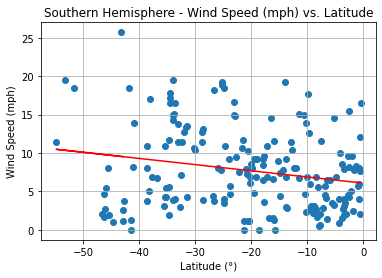

There is a slight negative correlation between max temperature and latitude in the Southern Hemisphere


<Figure size 432x288 with 0 Axes>

In [81]:
#Getting the values
x_values = SouthernHemi['Latitude']
y_values = SouthernHemi['Wind Speed']

#Linear regression
linear_regression = linregress(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

#Creating scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='red')

#Creating title
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

#Naming the axis
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (mph)')

#Grid 
plt.grid()

#Show figure
plt.show()

#Printing statement
print('There is a slight negative correlation between max temperature and latitude in the Southern Hemisphere')

#Creating png of results
plt.savefig('WeatherPyPhotos/SouthernHemisphereLatitudeVSWindSpeed.png')